## Now have final cleansed data. Data Discovery

## After spending time on this you found that having a fuller dataset may be more useful to you and you should try NOT cutting down the data first, so you don't lose information

Notes:
- Houses sold were between 2014-2015
- Zipcodes with most data available: 98103, 98038, 98115, 98052, 98117
98103 (Seattle - E Greenwood, Phinney Ridge, W Greenlake, Wallingford)
98038 (Maple Valley)
98115 (Seattle - Maple Leaf, Green Lake)
98052 (Redmond)
98117 (Seattle - Ballard, W Greenwood)
https://www.zipdatamaps.com/{zipcode}

## The zipcodes represented in the code below only accounted for 23? Later learned there were 57 - updated in the text below, but not in the code in the notebook
List of Seattle zipcodes (https://www.usmapguide.com/washington/seattle-zip-code-map/) - 57 zipcodes:
98101,98102,98103,98104,98105,98106,98107,98108,98109,98110,98111,98112,98114,98115,98116,98117,98118,98119,98121,98122,98124,98125,98126,98129,98131,98132,98133,98134,98136,98138,98144,98145,98146,98148,98151,98154,98155,98158,98160,98161,98164,98166,98168,98170,98171,98174,98177,98178,98181,98184,98185,98188,98190,98191,98195,98198,98199

## Learning: Focus on single family homes (1-6 bedrooms) under 2mm in Seattle zips (7427 records representing 23 Seattle zipcodes)

seattle_zips_df is table for this, also saved as csv (SEA_single_fam_less_than_twomil.csv)

In [603]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as stats
import seaborn as sns

# Import cleansed data file worked on in Data Cleansing notebook
data = pd.read_csv('data_cleaned.csv')

In [604]:
data['price_in_thousands'] = data['price']/1000

In [605]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,yr_of_assessment,has_been_viewed,grade_category,has_basement,has_been_renovated,price_in_thousands
0,5437600140,2015-01-10,325000.0,4,2.50,2240,5105,2.0,0.0,0.0,...,47.3922,-122.165,1920,5288,2015,1,Average,0,0,325.0
1,1982201596,2015-01-12,540000.0,3,1.75,1630,1404,2.0,0.0,0.0,...,47.6646,-122.367,1420,1670,2015,1,Average,1,0,540.0
2,2767604252,2015-01-12,344000.0,1,1.50,760,779,3.0,0.0,0.0,...,47.6715,-122.382,1290,1189,2015,1,Average,0,0,344.0
3,7504100360,2015-01-12,565000.0,4,2.50,2500,12090,1.0,0.0,0.0,...,47.6346,-122.045,3380,12760,2015,1,Average,0,0,565.0
4,2787700180,2015-01-12,320000.0,3,2.00,1250,8636,1.0,0.0,0.0,...,47.5066,-122.159,1620,7653,2015,1,Average,0,0,320.0


In [606]:
# Mapping a box on map - where are these properties - Kings County WA
# https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db
BBox = ((data.long.min(), data.long.max(),
         data.lat.min(), data.lat.max()))

BBox

(-122.519, -121.315, 47.1559, 47.7776)

In [607]:
# Data Discovery on Zipcodes
zipcode_vals = data['zipcode'].unique()

In [608]:
# Create new DataFrame
column_names = ["zipcode", "property_count", "long_min", "long_max", "lat_min", "lat_max", 
                "price_min", "price_max", "price_avg", "price_med"]

zipcode_overview = pd.DataFrame(columns = column_names)

zipcode_overview

,zipcode,property_count,long_min,long_max,lat_min,lat_max,price_min,price_max,price_avg,price_med


In [609]:
#populate zipcode column
zipcode_overview['zipcode'] = zipcode_vals

In [610]:
# Preview DataFrame
zipcode_overview

,zipcode,property_count,long_min,long_max,lat_min,lat_max,price_min,price_max,price_avg,price_med
0,98042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,98074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,98059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,98115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
65,98010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,98102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,98002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,98148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [611]:
pd.unique(data['zipcode'])

array([98042, 98107, 98074, 98059, 98115, 98030, 98075, 98028, 98034,
       98118, 98032, 98040, 98166, 98103, 98177, 98006, 98023, 98038,
       98004, 98117, 98029, 98125, 98155, 98003, 98112, 98178, 98105,
       98058, 98053, 98198, 98024, 98045, 98092, 98106, 98133, 98005,
       98146, 98108, 98007, 98031, 98055, 98014, 98008, 98027, 98070,
       98022, 98033, 98019, 98126, 98072, 98136, 98052, 98122, 98168,
       98109, 98144, 98001, 98199, 98116, 98065, 98119, 98056, 98077,
       98188, 98011, 98010, 98102, 98002, 98148, 98039])

In [612]:
#testing
data[data['zipcode'] == zipcode_vals[0]]['id'].count()

547

In [613]:
# Populate rest of zipcode_overview DataFrame

# Create lists
zipcode_property_count = []
zipcode_long_min = []
zipcode_long_max = []
zipcode_lat_min = []
zipcode_lat_max = []
zipcode_price_min = []
zipcode_price_max = []
zipcode_price_avg = []
zipcode_price_med = []

# Get df values for each zipcode
for zipcode in zipcode_vals:
    zipcode_property_count.append(data[data['zipcode'] == zipcode]['id'].count())
    zipcode_long_min.append(data[data['zipcode'] == zipcode]['long'].min())
    zipcode_long_max.append(data[data['zipcode'] == zipcode]['long'].max())
    zipcode_lat_min.append(data[data['zipcode'] == zipcode]['lat'].min())
    zipcode_lat_max.append(data[data['zipcode'] == zipcode]['lat'].max())
    zipcode_price_min.append(data[data['zipcode'] == zipcode]['price'].min())
    zipcode_price_max.append(data[data['zipcode'] == zipcode]['price'].max())
    zipcode_price_avg.append(round(data[data['zipcode'] == zipcode]['price'].mean(), 0))
    zipcode_price_med.append(data[data['zipcode'] == zipcode]['price'].median())
    

# Assign lists to df columns
zipcode_overview['property_count'] = zipcode_property_count
zipcode_overview['long_min'] = zipcode_long_min
zipcode_overview['long_max'] = zipcode_long_max
zipcode_overview['lat_min'] = zipcode_lat_min
zipcode_overview['lat_max'] = zipcode_lat_max
zipcode_overview['price_min'] = zipcode_price_min
zipcode_overview['price_max'] = zipcode_price_max
zipcode_overview['price_avg'] = zipcode_price_avg
zipcode_overview['price_med'] = zipcode_price_med

In [614]:
#Preview 
zipcode_overview

,zipcode,property_count,long_min,long_max,lat_min,lat_max,price_min,price_max,price_avg,price_med
0,98042,547,-122.177,-122.039,47.3117,47.4230,105000.0,859000.0,311580.0,291500.0
1,98107,266,-122.406,-122.351,47.6536,47.6762,290000.0,2950000.0,579110.0,529950.0
2,98074,441,-122.089,-121.992,47.5906,47.6569,280000.0,3080000.0,685676.0,642000.0
3,98059,468,-122.188,-122.063,47.4596,47.5405,172500.0,1780000.0,493625.0,435000.0
4,98115,583,-122.329,-122.263,47.6721,47.7009,200000.0,2300000.0,619944.0,567000.0
...,...,...,...,...,...,...,...,...,...,...
65,98010,100,-122.053,-121.867,47.2931,47.3783,135000.0,935000.0,423666.0,359999.5
66,98102,104,-122.385,-122.310,47.5617,47.6507,330000.0,7700000.0,899608.0,710000.0
67,98002,199,-122.229,-122.080,47.2761,47.3532,95000.0,389000.0,234284.0,235000.0
68,98148,57,-122.336,-122.322,47.4238,47.4666,105500.0,600600.0,284909.0,278000.0


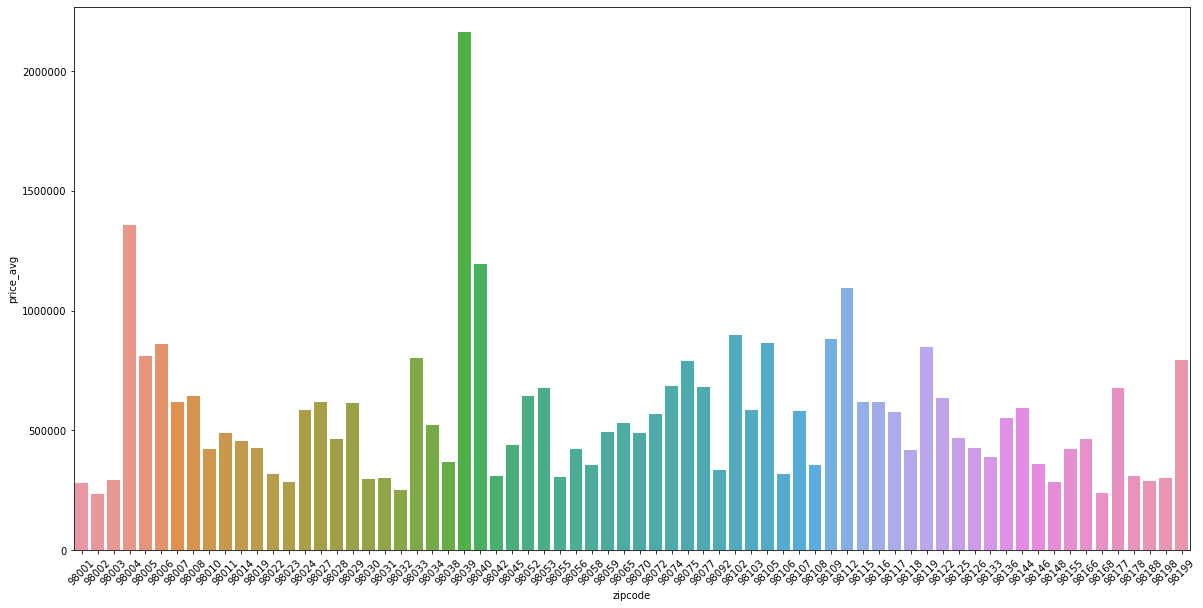

In [615]:
# Plot average home price by zip 
plt.figure(figsize=(20,10))
ax = sns.barplot(x=zipcode_overview['zipcode'], y=zipcode_overview['price_avg'])
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

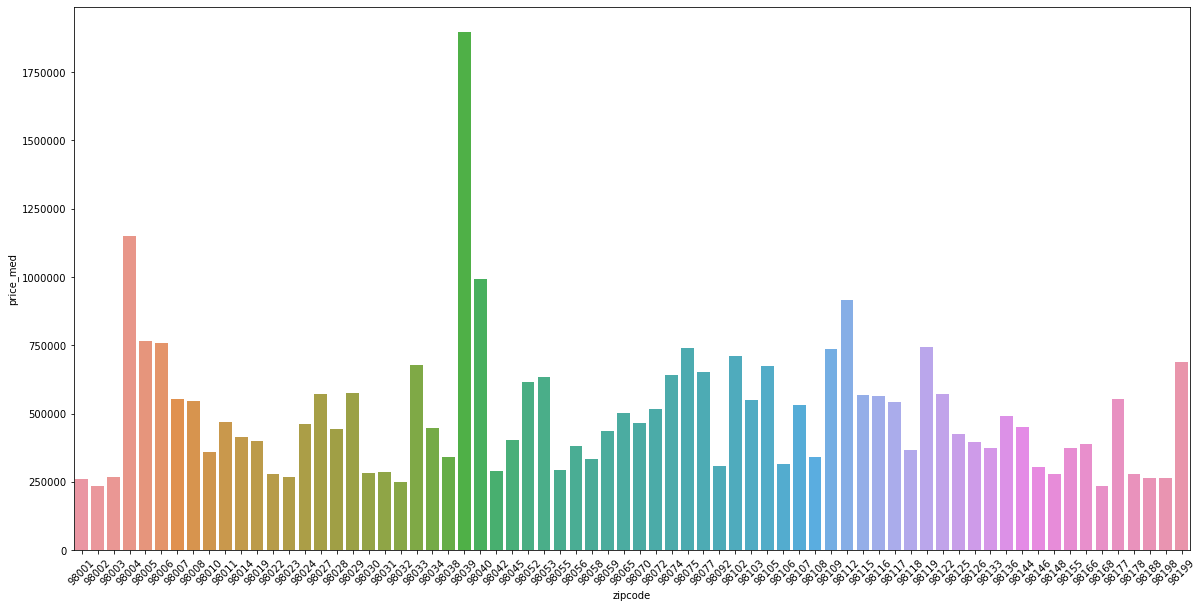

In [616]:
# Plot median home price by zip in case of outliers
plt.figure(figsize=(20,10))
ax = sns.barplot(x=zipcode_overview['zipcode'], y=zipcode_overview['price_med'])
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [617]:
# Top represented zipcodes
top_5_zips_repped = zipcode_overview.sort_values(by='property_count', ascending=False)['zipcode'][:5].tolist()

In [618]:
top_5_zips_repped

[98103, 98038, 98115, 98052, 98117]

In [619]:
# Create DataFrame of all records from full "data" dataset from the zipcodes that have the most records/info available
top_5_zips_repped_full_data = data[data['zipcode'].isin(top_5_zips_repped)]

In [620]:
# View columns names in full data set
top_5_zips_repped_full_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_of_assessment',
       'has_been_viewed', 'grade_category', 'has_basement',
       'has_been_renovated', 'price_in_thousands'],
      dtype='object')

In [621]:
# What years were the top zipcodes assessed?
top_5_zips_repped_full_data.groupby(by=['zipcode', 'yr_of_assessment'])['id'].count()

zipcode  yr_of_assessment
98038    2014                376
         2015                213
98052    2014                416
         2015                158
98103    2014                432
         2015                170
98115    2014                397
         2015                186
98117    2014                396
         2015                157
Name: id, dtype: int64

In [622]:
# Testing different pivot table showing min and max year of assessment per zipcode
top_5_zips_repped_full_data.groupby(by='zipcode').agg({'yr_of_assessment': ['min', 'max']})

yr_of_assessment      
                     min   max
zipcode                       
98038               2014  2015
98052               2014  2015
98103               2014  2015
98115               2014  2015
98117               2014  2015

In [623]:
# What are mins and maxs for assessment in full dataset (all zips)
data.groupby(by='zipcode').agg({'yr_of_assessment': ['min', 'max']})

yr_of_assessment      
                     min   max
zipcode                       
98001               2014  2015
98002               2014  2015
98003               2014  2015
98004               2014  2015
98005               2014  2015
...                  ...   ...
98177               2014  2015
98178               2014  2015
98188               2014  2015
98198               2014  2015
98199               2014  2015

[70 rows x 2 columns]

In [624]:
# Describe on year of assessment to reconfirm
data['yr_of_assessment'].describe()

count    21597.000000
mean      2014.322962
std          0.467619
min       2014.000000
25%       2014.000000
50%       2014.000000
75%       2015.000000
max       2015.000000
Name: yr_of_assessment, dtype: float64

In [625]:
data['yr_built'].describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [626]:
top_5_zips_repped_full_data['yr_built'].describe()

count    2901.000000
mean     1966.389866
std        34.914586
min      1900.000000
25%      1932.000000
50%      1974.000000
75%      2001.000000
max      2015.000000
Name: yr_built, dtype: float64

In [627]:
# What are mins and maxs for assessment in full dataset (all zips)
top_5_zips_repped_full_data.groupby(by='zipcode').agg({'yr_built': ['min', 'max'], 'has_been_renovated':['sum'], 'price':['min', 'max']})

yr_built       has_been_renovated     price           
             min   max                sum       min        max
zipcode                                                       
98038       1919  2014                  9  110000.0  1350000.0
98052       1919  2014                  8  225000.0  2200000.0
98103       1900  2015                 25  238000.0  1700000.0
98115       1900  2015                 32  200000.0  2300000.0
98117       1900  2015                 23  125000.0  1370000.0

98103
Count Ren: 25
Mean Yr Ren: 1993.76


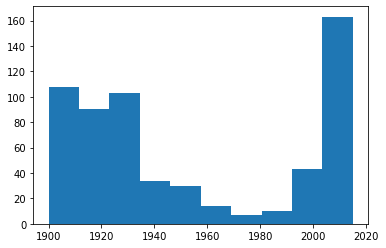

98038
Count Ren: 9
Mean Yr Ren: 1996.3333333333333


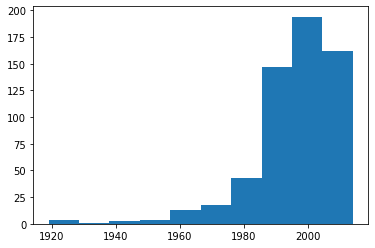

98115
Count Ren: 32
Mean Yr Ren: 1992.71875


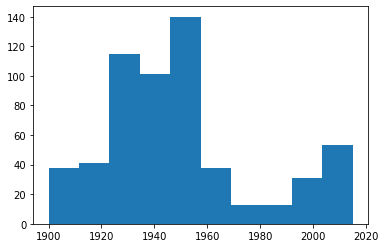

98052
Count Ren: 8
Mean Yr Ren: 1998.25


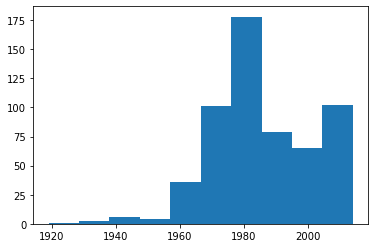

98117
Count Ren: 23
Mean Yr Ren: 1998.695652173913


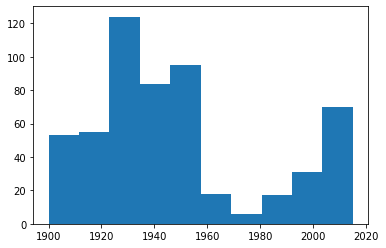

In [628]:
# Large range of build years
for zipcode in top_5_zips_repped:
    print(zipcode)
    zip_table = data[data['zipcode'] == zipcode]
    print(f"Count Ren: {len(zip_table[zip_table['has_been_renovated'] == 1])}")
    print(f"Mean Yr Ren: {zip_table[zip_table['has_been_renovated'] == 1]['yr_renovated'].mean()}")
    plt.hist(x=zip_table['yr_built'])
    plt.show()

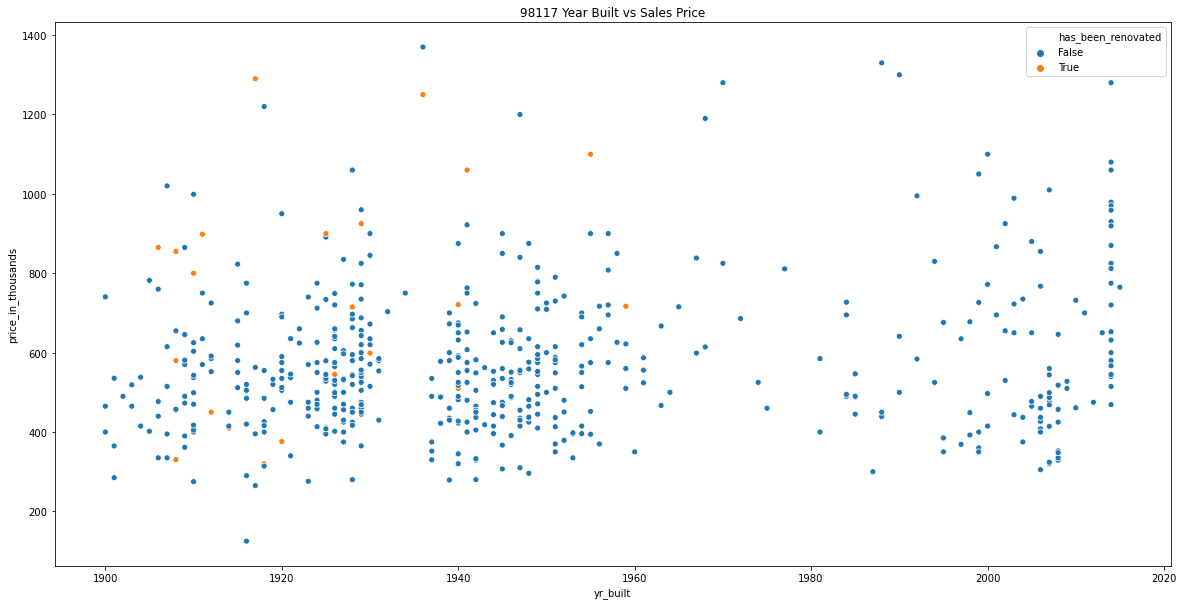

In [629]:
zip_table = data[data['zipcode'] == 98117]
plt.figure(figsize= (20,10))
sns.scatterplot(x=zip_table['yr_built'], y=zip_table['price_in_thousands'], hue=zip_table['has_been_renovated'] == 1)
plt.title('98117 Year Built vs Sales Price')
plt.show()

98103
Total number of houses: 602
Total number of renovations: 602


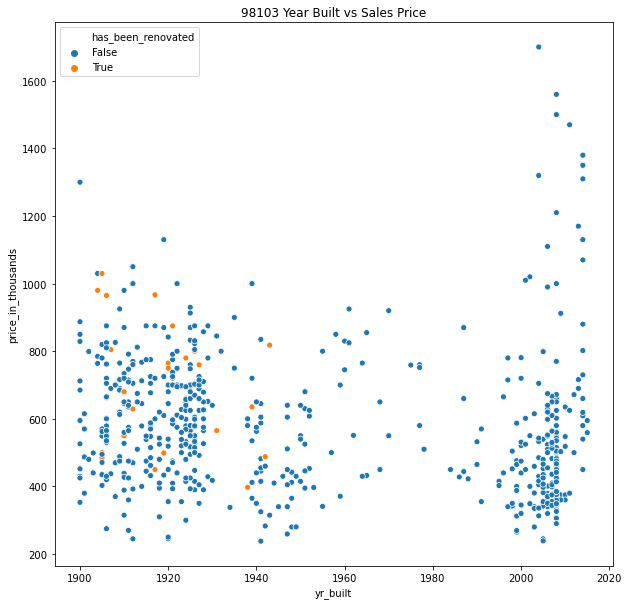

98038
Total number of houses: 589
Total number of renovations: 589


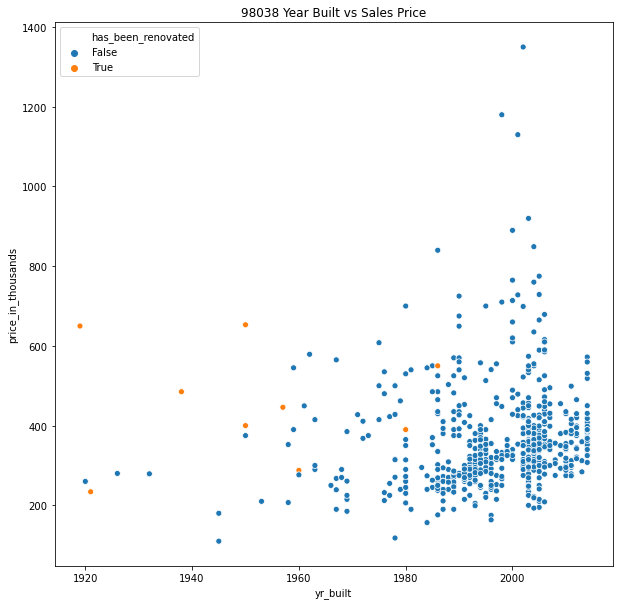

98115
Total number of houses: 583
Total number of renovations: 583


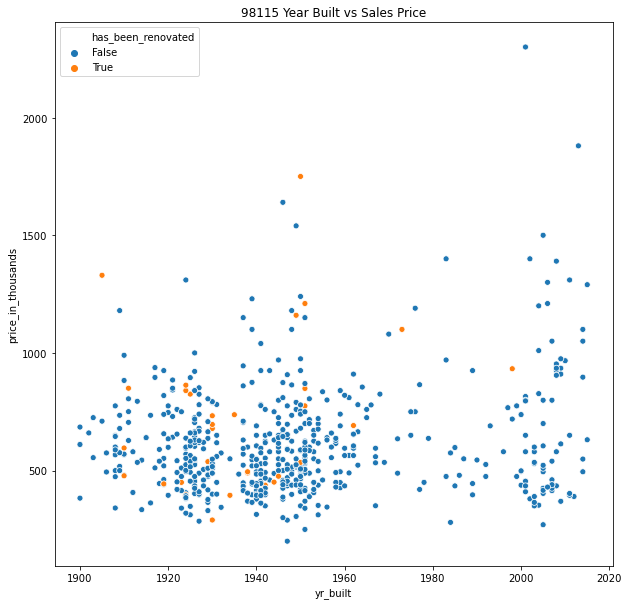

98052
Total number of houses: 574
Total number of renovations: 574


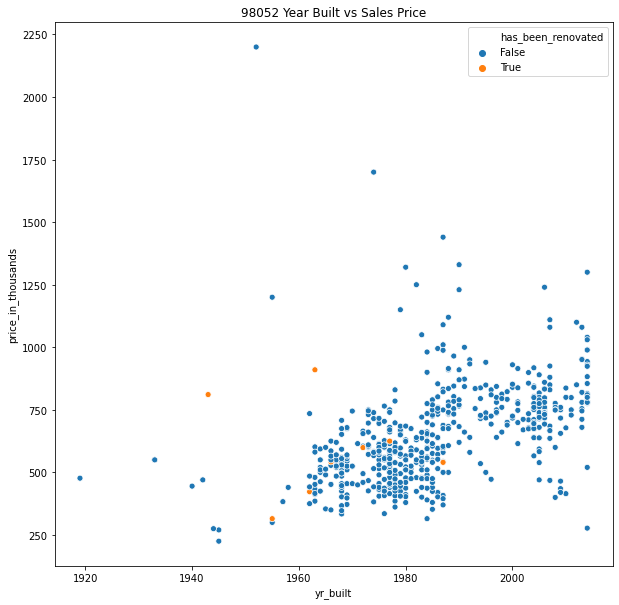

98117
Total number of houses: 553
Total number of renovations: 553


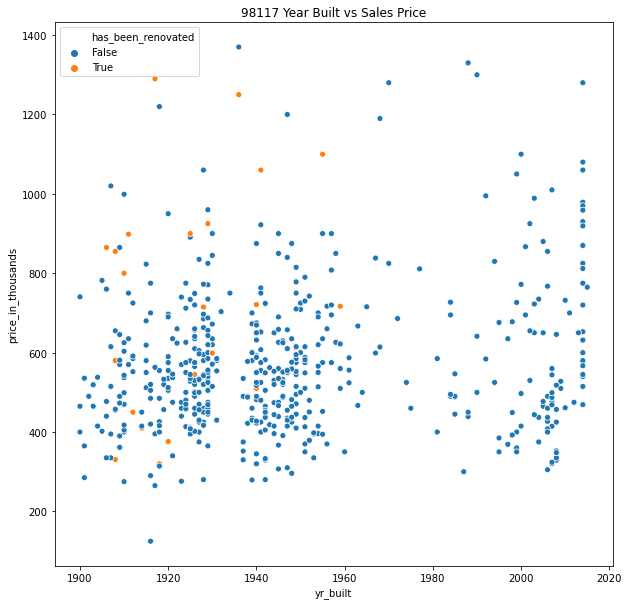

In [630]:
for zipcode in top_5_zips_repped:
    print(zipcode)
    zip_table = data[data['zipcode'] == zipcode]
    print(f"Total number of houses: {len(zip_table)}")
    print(f"Total number of renovations: {len(zip_table['has_been_renovated'] == 1)}")
    plt.figure(figsize=(10,10))
    sns.scatterplot(x=zip_table['yr_built'], y=zip_table['price_in_thousands'], hue=zip_table['has_been_renovated'] == 1)
    plt.title(f'{zipcode} Year Built vs Sales Price')
    plt.show()

In [631]:
# Top 3 of 5 zips are in Seattle -- what is question just covered Seattle?
seattle_zips_all = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 
                98112, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98125, 
                98126, 98133, 98134, 98136, 98144, 98146, 98154, 98164, 98174, 
                98177, 98178, 98195, 98199]

In [632]:
seattle_zips_df = data[data['zipcode'].isin(seattle_zips_all)]

In [633]:
seattle_zips_df.groupby(by='zipcode')['id'].count()

zipcode
98102    104
98103    602
98105    229
98106    335
98107    266
98108    186
98109    109
98112    269
98115    583
98116    330
98117    553
98118    507
98119    184
98122    290
98125    409
98126    354
98133    493
98136    263
98144    343
98146    288
98177    255
98178    262
98199    317
Name: id, dtype: int64

In [634]:
# Pivot table for overview of Seattle zips, houses built from 1900-2014/2015
seattle_zips_df.groupby('zipcode').agg({'id':['count'],'yr_built': ['min', 'max'], 'has_been_renovated':['sum'], 'price':['min', 'max']})

id yr_built       has_been_renovated     price           
        count      min   max                sum       min        max
zipcode                                                             
98102     104     1900  2014                  4  330000.0  7700000.0
98103     602     1900  2015                 25  238000.0  1700000.0
98105     229     1903  2014                 14  380000.0  3650000.0
98106     335     1905  2015                 13   90000.0   795000.0
98107     266     1900  2015                 13  290000.0  2950000.0
98108     186     1900  2014                  2   90000.0   640000.0
98109     109     1900  2015                  7  216650.0  3200000.0
98112     269     1900  2015                 21  169317.0  3400000.0
98115     583     1900  2015                 32  200000.0  2300000.0
98116     330     1900  2015                 26  130000.0  2050000.0
98117     553     1900  2015                 23  125000.0  1370000.0
98118     507     1900  2014                 23  109000.0  2900000.0
98119     184     1900  2015                 16  300523.0  3070000.0
98122     290     1900  2015                 28  202000.0  2050000.0
98125     409     1904  2014                 19  175000.0  2050000.0
98126     354     1907  2014                 16  110000.0  1090000.0
98133     493     1900  2015                 14  130000.0   808100.0
98136     263     1900  2015                 20  200000.0  2230000.0
98144     343     1900  2015                 23  181000.0  3600000.0
98146     288     1908  2014                 20   82000.0  1410000.0
98177     255     1906  2014                 16  245560.0  3800000.0
98178     262     1905  2014                  9   90000.0  1700000.0
98199     317     1901  2015                 23  323000.0  3200000.0

In [635]:
seattle_zips_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_of_assessment',
       'has_been_viewed', 'grade_category', 'has_basement',
       'has_been_renovated', 'price_in_thousands'],
      dtype='object')

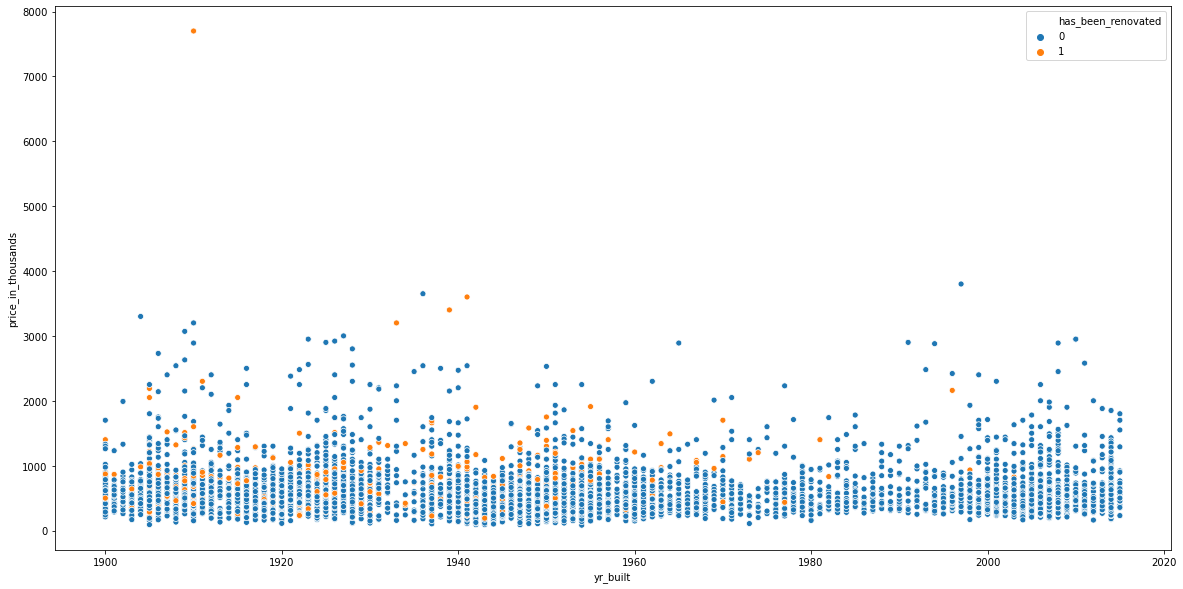

In [636]:
x=seattle_zips_df['yr_built']
y=seattle_zips_df['price_in_thousands']
plt.figure (figsize=(20,10))
sns.scatterplot(x, y, hue=seattle_zips_df['has_been_renovated'])

In [637]:
# Create list of Seattle zips represented in full data set
seattle_zips = list(seattle_zips_df['zipcode'].unique())

In [638]:
data[data['zipcode'] == seattle_zips[0]]['id'].count()

266

In [639]:
data[(data['zipcode'] == zipcode)|(data['has_been_renovated'] == 1)]['id'].count()

1274

In [640]:
# Create DataFrame
column_names = ["zipcode", "property_count", "renovation_count", "price_min", "price_max", 
                "price_avg", "price_med", "long_min", "long_max", "lat_min", "lat_max"]

seattle_zip_summ_df = pd.DataFrame(columns = column_names)

seattle_zip_summ_df

# Populate zipcode column
seattle_zip_summ_df['zipcode'] = seattle_zips

# Create lists
zipcode_property_count = []
zipcode_renovation_count = []
zipcode_price_min = []
zipcode_price_max = []
zipcode_price_avg = []
zipcode_price_med = []
zipcode_long_min = []
zipcode_long_max = []
zipcode_lat_min = []
zipcode_lat_max = []

# Get df values for each zipcode
for zipcode in seattle_zips:
    zipcode_property_count.append(data[data['zipcode'] == zipcode]['id'].count())
    zipcode_renovation_count.append(data[(data['zipcode'] == zipcode)|(data['has_been_renovated'] == 1)]['id'].count())
    zipcode_price_min.append(round(data[data['zipcode'] == zipcode]['price_in_thousands'].min(),0))
    zipcode_price_max.append(round(data[data['zipcode'] == zipcode]['price_in_thousands'].max(),0))
    zipcode_price_avg.append(round(data[data['zipcode'] == zipcode]['price_in_thousands'].mean(),0))
    zipcode_price_med.append(round(data[data['zipcode'] == zipcode]['price_in_thousands'].median(),0))
    zipcode_long_min.append(data[data['zipcode'] == zipcode]['long'].min())
    zipcode_long_max.append(data[data['zipcode'] == zipcode]['long'].max())
    zipcode_lat_min.append(data[data['zipcode'] == zipcode]['lat'].min())
    zipcode_lat_max.append(data[data['zipcode'] == zipcode]['lat'].max())
    

# Assign lists to df columns
seattle_zip_summ_df['property_count'] = zipcode_property_count
seattle_zip_summ_df['renovation_count'] = zipcode_renovation_count
seattle_zip_summ_df['price_min'] = zipcode_price_min
seattle_zip_summ_df['price_max'] = zipcode_price_max
seattle_zip_summ_df['price_avg'] = zipcode_price_avg
seattle_zip_summ_df['price_med'] = zipcode_price_med
seattle_zip_summ_df['long_min'] = zipcode_long_min
seattle_zip_summ_df['long_max'] = zipcode_long_max
seattle_zip_summ_df['lat_min'] = zipcode_lat_min
seattle_zip_summ_df['lat_max'] = zipcode_lat_max

# View DataFrame
seattle_zip_summ_df

,zipcode,property_count,renovation_count,price_min,price_max,price_avg,price_med,long_min,long_max,lat_min,lat_max
0,98107,266,997,290.0,2950.0,579.0,530.0,-122.406,-122.351,47.6536,47.6762
1,98115,583,1295,200.0,2300.0,620.0,567.0,-122.329,-122.263,47.6721,47.7009
2,98118,507,1228,109.0,2900.0,418.0,368.0,-122.292,-122.249,47.5118,47.5694
3,98103,602,1321,238.0,1700.0,585.0,550.0,-122.364,-122.329,47.6485,47.7011
4,98177,255,983,246.0,3800.0,676.0,554.0,-122.393,-122.357,47.7013,47.7776
5,98117,553,1274,125.0,1370.0,577.0,544.0,-122.404,-122.357,47.6754,47.7014
6,98125,409,1134,175.0,2050.0,470.0,425.0,-122.329,-122.274,47.6963,47.7338
7,98112,269,992,169.0,3400.0,1096.0,915.0,-122.315,-122.279,47.6181,47.6467
8,98178,262,997,90.0,1700.0,311.0,278.0,-122.279,-122.220,47.4816,47.5121
9,98105,229,959,380.0,3650.0,863.0,675.0,-122.329,-122.256,47.6515,47.6719


In [641]:
seattle_zip_summ_sorted_pricemed = seattle_zip_summ_df.sort_values(by='price_med')

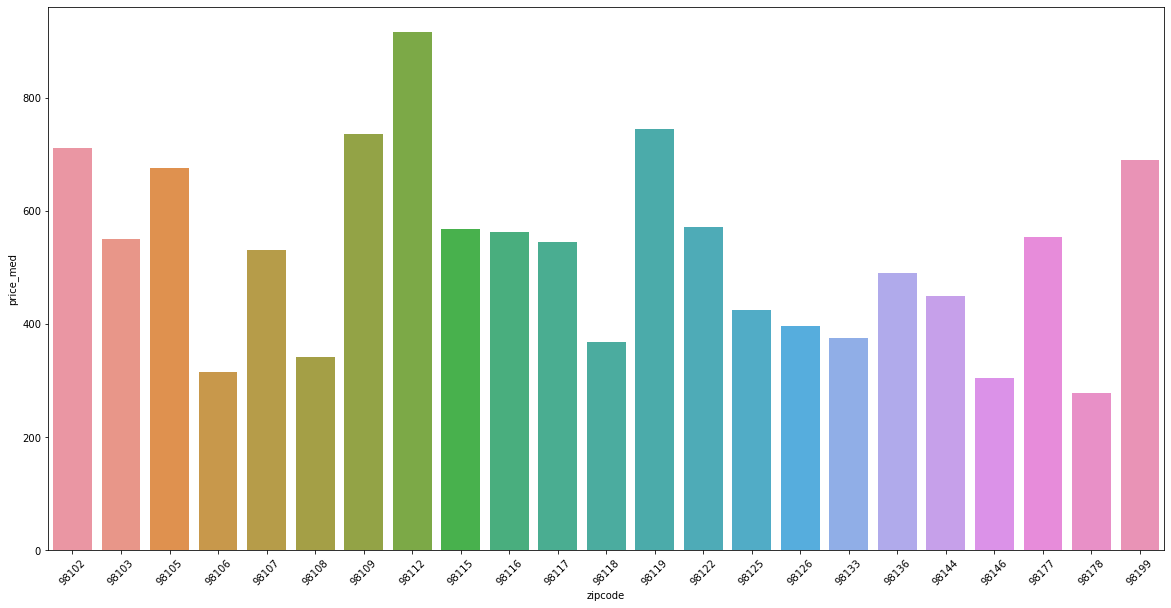

In [642]:
# Plot median home price by zip in case of outliers
plt.figure(figsize=(20,10))
ax = sns.barplot(x=seattle_zip_summ_df['zipcode'], y=seattle_zip_summ_df['price_med'])
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [643]:
# Get overview of price in Seattle, there are outliers
seattle_zips_df['price_in_thousands'].describe()

count    7531.000000
mean      569.563760
std       347.656715
min        82.000000
25%       370.000000
50%       490.000000
75%       662.845000
max      7700.000000
Name: price_in_thousands, dtype: float64

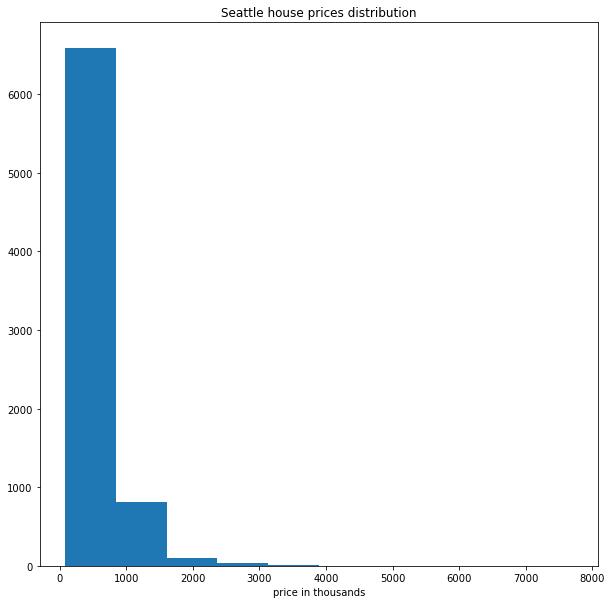

In [644]:
plt.figure(figsize=(10,10))
plt.hist(seattle_zips_df['price_in_thousands'])
plt.title('Seattle house prices distribution')
plt.xlabel('price in thousands')
plt.show()

In [645]:
# How many are 2mm and higher?
len(seattle_zips_df[seattle_zips_df['price_in_thousands'] > 2000])

72

In [646]:
# Check length of full seattle dataset
len(seattle_zips_df)

7531

In [647]:
# Remove outliers
seattle_zips_df = seattle_zips_df[seattle_zips_df.price_in_thousands <= 2000]

In [648]:
# Check work
len(seattle_zips_df)

7459

In [649]:
# Number of bedrooms check - single or multi family homes
seattle_zips_df['bedrooms'].describe()

count    7459.000000
mean        3.143853
std         1.051672
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        33.000000
Name: bedrooms, dtype: float64

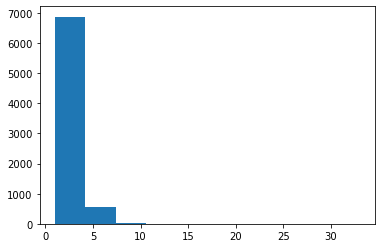

In [650]:
plt.hist(seattle_zips_df['bedrooms'])
plt.show()

In [651]:
len(seattle_zips_df[seattle_zips_df['bedrooms'] >= 10])

3

In [652]:
len(seattle_zips_df[seattle_zips_df['bedrooms'] >= 7])

32

In [653]:
# Remove bedroom outliers, focus on single family homes in Seattle
seattle_zips_df = seattle_zips_df[seattle_zips_df['bedrooms'] < 7]

In [654]:
# Check work
len(seattle_zips_df)

7427

In [655]:
seattle_zips_df = seattle_zips_df.reset_index(drop=True)

In [656]:
seattle_zips_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,yr_of_assessment,has_been_viewed,grade_category,has_basement,has_been_renovated,price_in_thousands
0,1982201596,2015-01-12,540000.0,3,1.75,1630,1404,2.0,0.0,0.0,...,47.6646,-122.367,1420,1670,2015,1,Average,1,0,540.00
1,2767604252,2015-01-12,344000.0,1,1.50,760,779,3.0,0.0,0.0,...,47.6715,-122.382,1290,1189,2015,1,Average,0,0,344.00
2,9547200530,2015-01-12,780000.0,6,4.00,3300,5720,1.0,0.0,0.0,...,47.6760,-122.309,2030,4080,2015,1,Average,1,0,780.00
3,4242900245,2015-01-12,618000.0,2,1.00,1890,4700,1.0,0.0,0.0,...,47.6747,-122.391,2150,4700,2015,1,Average,1,0,618.00
4,7186800105,2015-01-12,236500.0,4,1.00,2140,4217,1.5,0.0,0.0,...,47.5484,-122.287,1720,5413,2015,1,Average,1,0,236.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422,342000570,2014-09-09,429000.0,2,1.00,1080,3600,1.0,0.0,0.0,...,47.6078,-122.291,2230,4500,2014,1,Average,0,0,429.00
7423,4059400515,2014-09-09,229950.0,2,1.00,920,7716,1.0,0.0,0.0,...,47.5028,-122.243,1410,7128,2014,1,Average,0,0,229.95
7424,5347200060,2014-09-09,280000.0,2,1.00,1260,4800,1.0,0.0,0.0,...,47.5196,-122.376,1260,2435,2014,1,Average,1,0,280.00
7425,123039633,2014-09-09,359950.0,3,1.75,1570,6975,1.0,0.0,0.0,...,47.5137,-122.370,1280,7813,2014,1,Average,1,0,359.95


In [657]:
# Saving Seattle single family homes < 2mm data to new file
data.to_csv('SEA_single_fam_less_than_twomil.csv', index=False)

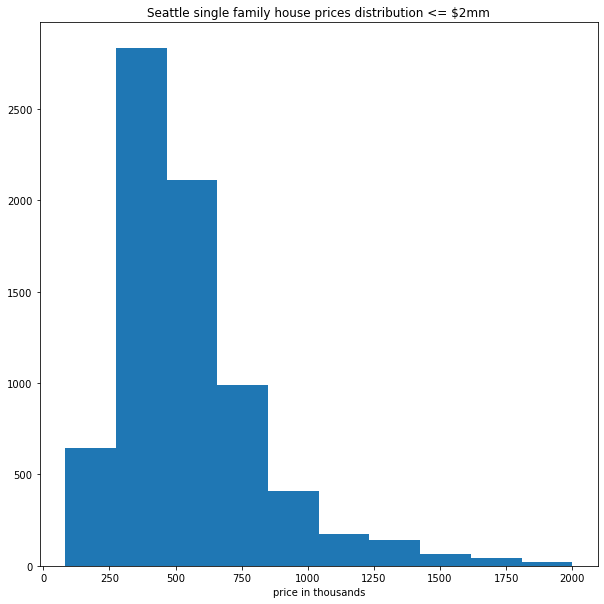

In [658]:
# Replot with refined dataset < $2mm and < 7 bedrooms
plt.figure(figsize=(10,10))
plt.hist(seattle_zips_df['price_in_thousands'])
plt.title('Seattle single family house prices distribution <= $2mm')
plt.xlabel('price in thousands')
plt.show()

In [659]:
# Look at new pricing spread in numbers
seattle_zips_df['price_in_thousands'].describe()

count    7427.000000
mean      549.076844
std       275.376780
min        82.000000
25%       368.000000
50%       485.000000
75%       655.000000
max      2000.000000
Name: price_in_thousands, dtype: float64

In [660]:
# Peak below 500k - how many houses?
len(seattle_zips_df[seattle_zips_df['price_in_thousands'] <= 500])

3959

In [661]:
# Create pivot table
seattle_zips_pivot = seattle_zips_df.groupby(by='zipcode').agg({'id': ['count'], 'price_in_thousands': ['median'], 'grade':['mean'], 'bedrooms': ['mean', 'min', 'max']})

In [662]:
seattle_zips_pivot

id price_in_thousands     grade  bedrooms        
        count             median      mean      mean min max
zipcode                                                     
98102      97            690.000  8.134021  3.103093   2   6
98103     599            550.000  7.412354  2.993322   1   6
98105     215            667.750  7.758140  3.386047   1   6
98106     333            313.500  6.864865  3.066066   1   6
98107     263            529.950  7.399240  2.969582   1   6
98108     186            342.500  7.016129  3.204301   1   6
98109     107            736.000  7.962617  3.149533   1   6
98112     242            855.500  8.264463  3.384298   1   6
98115     582            566.000  7.353952  3.202749   1   6
98116     329            560.000  7.559271  3.063830   1   6
98117     550            542.500  7.280000  2.998182   1   6
98118     504            367.500  6.968254  3.113095   1   6
98119     177            727.000  7.937853  3.192090   2   6
98122     287            570.000  7.742160  3.128920   1   6
98125     406            425.000  7.177340  3.189655   1   6
98126     354            395.750  7.031073  2.836158   1   6
98133     490            375.000  7.120408  3.112245   1   6
98136     261            485.000  7.383142  2.923372   1   6
98144     335            450.000  7.397015  3.173134   1   6
98146     288            305.000  6.822917  3.125000   1   6
98177     249            540.000  7.887550  3.373494   1   6
98178     262            278.277  6.816794  3.305344   1   6
98199     311            680.000  7.961415  3.180064   1   6

In [663]:
len(seattle_zips_in_data)

23

In [664]:
seattle_zips_pivot.sort_values([('price_in_thousands', 'median')])

id price_in_thousands     grade  bedrooms        
        count             median      mean      mean min max
zipcode                                                     
98178     262            278.277  6.816794  3.305344   1   6
98146     288            305.000  6.822917  3.125000   1   6
98106     333            313.500  6.864865  3.066066   1   6
98108     186            342.500  7.016129  3.204301   1   6
98118     504            367.500  6.968254  3.113095   1   6
98133     490            375.000  7.120408  3.112245   1   6
98126     354            395.750  7.031073  2.836158   1   6
98125     406            425.000  7.177340  3.189655   1   6
98144     335            450.000  7.397015  3.173134   1   6
98136     261            485.000  7.383142  2.923372   1   6
98107     263            529.950  7.399240  2.969582   1   6
98177     249            540.000  7.887550  3.373494   1   6
98117     550            542.500  7.280000  2.998182   1   6
98103     599            550.000  7.412354  2.993322   1   6
98116     329            560.000  7.559271  3.063830   1   6
98115     582            566.000  7.353952  3.202749   1   6
98122     287            570.000  7.742160  3.128920   1   6
98105     215            667.750  7.758140  3.386047   1   6
98199     311            680.000  7.961415  3.180064   1   6
98102      97            690.000  8.134021  3.103093   2   6
98119     177            727.000  7.937853  3.192090   2   6
98109     107            736.000  7.962617  3.149533   1   6
98112     242            855.500  8.264463  3.384298   1   6

In [665]:
# Look back at full data set, preview
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,yr_of_assessment,has_been_viewed,grade_category,has_basement,has_been_renovated,price_in_thousands
0,5437600140,2015-01-10,325000.0,4,2.50,2240,5105,2.0,0.0,0.0,...,47.3922,-122.165,1920,5288,2015,1,Average,0,0,325.0
1,1982201596,2015-01-12,540000.0,3,1.75,1630,1404,2.0,0.0,0.0,...,47.6646,-122.367,1420,1670,2015,1,Average,1,0,540.0
2,2767604252,2015-01-12,344000.0,1,1.50,760,779,3.0,0.0,0.0,...,47.6715,-122.382,1290,1189,2015,1,Average,0,0,344.0
3,7504100360,2015-01-12,565000.0,4,2.50,2500,12090,1.0,0.0,0.0,...,47.6346,-122.045,3380,12760,2015,1,Average,0,0,565.0
4,2787700180,2015-01-12,320000.0,3,2.00,1250,8636,1.0,0.0,0.0,...,47.5066,-122.159,1620,7653,2015,1,Average,0,0,320.0


In [666]:
# What is the average price for a house with grade higher than 6.8 (min of Seattle) 
# with same restrictions (single fam, <2mm)
data[(data['grade'] >= 6.8) & (data['bedrooms'] < 7) & 
     (data['price_in_thousands'] <= 2000)]['price_in_thousands'].mean()

546.1614361506547

## Attempting modeling again now that have data subset

## Shitty model flow

In [718]:
# Import all the scikit learn

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [719]:
seattle_zips_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,yr_of_assessment,has_been_viewed,grade_category,has_basement,has_been_renovated,price_in_thousands
0,1982201596,2015-01-12,540000.0,3,1.75,1630,1404,2.0,0.0,0.0,...,47.6646,-122.367,1420,1670,2015,1,Average,1,0,540.00
1,2767604252,2015-01-12,344000.0,1,1.50,760,779,3.0,0.0,0.0,...,47.6715,-122.382,1290,1189,2015,1,Average,0,0,344.00
2,9547200530,2015-01-12,780000.0,6,4.00,3300,5720,1.0,0.0,0.0,...,47.6760,-122.309,2030,4080,2015,1,Average,1,0,780.00
3,4242900245,2015-01-12,618000.0,2,1.00,1890,4700,1.0,0.0,0.0,...,47.6747,-122.391,2150,4700,2015,1,Average,1,0,618.00
4,7186800105,2015-01-12,236500.0,4,1.00,2140,4217,1.5,0.0,0.0,...,47.5484,-122.287,1720,5413,2015,1,Average,1,0,236.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422,342000570,2014-09-09,429000.0,2,1.00,1080,3600,1.0,0.0,0.0,...,47.6078,-122.291,2230,4500,2014,1,Average,0,0,429.00
7423,4059400515,2014-09-09,229950.0,2,1.00,920,7716,1.0,0.0,0.0,...,47.5028,-122.243,1410,7128,2014,1,Average,0,0,229.95
7424,5347200060,2014-09-09,280000.0,2,1.00,1260,4800,1.0,0.0,0.0,...,47.5196,-122.376,1260,2435,2014,1,Average,1,0,280.00
7425,123039633,2014-09-09,359950.0,3,1.75,1570,6975,1.0,0.0,0.0,...,47.5137,-122.370,1280,7813,2014,1,Average,1,0,359.95


In [720]:
seattle_zips_df.corr().price.sort_values(ascending=False)

price_in_thousands    1.000000
price                 1.000000
sqft_living           0.708336
grade                 0.680625
sqft_above            0.659222
sqft_living15         0.635031
bathrooms             0.485370
view                  0.391669
sqft_basement         0.362677
bedrooms              0.353408
has_basement          0.247082
floors                0.238047
lat                   0.207667
condition             0.171897
yr_renovated          0.145995
has_been_renovated    0.145422
waterfront            0.144511
sqft_lot              0.123958
sqft_lot15            0.099245
yr_of_assessment      0.012898
id                   -0.016115
has_been_viewed      -0.029204
zipcode              -0.031275
yr_built             -0.054990
long                 -0.058450
Name: price, dtype: float64

In [721]:
# Define our X and y

# include all column names in a list except for target (price) and categoricals
X_cols = [c for c in seattle_zips_df.columns.to_list() if c not in ['id', 'date','price', 'price_in_thousands', 
                                                                    'grade_category']]

X = seattle_zips_df[X_cols]
y = seattle_zips_df['price']

In [722]:
model = sm.OLS(y,sm.add_constant(X))

In [723]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     951.3
Date:                Sun, 10 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:49:10   Log-Likelihood:                -98584.
No. Observations:                7427   AIC:                         1.972e+05
Df Residuals:                    7404   BIC:                         1.974e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.316e+07   1.09e+07     -3.055      0.002   -5.44e+07   -1.19e+07
bedrooms           -2.642e+04   2328.371    -11.347      0.000    -3.1e+04   -2.19e+04
bathrooms           1.681e+04   3639.160      4.618      0.000    9672.613    2.39e+04
sqft_living           83.8819     25.235      3.324      0.001      34.414     133.350
sqft_lot              -2.5933      0.722     -3.591      0.000      -4.009      -1.178
floors             -3122.4844   4378.826     -0.713      0.476   -1.17e+04    5461.259
waterfront          3.964e+05   2.74e+04     14.466      0.000    3.43e+05     4.5e+05
view                2.429e+04   2383.452     10.189      0.000    1.96e+04     2.9e+04
condition           2.463e+04   2643.748      9.315      0.000    1.94e+04    2.98e+04
grade               1.062e+05   2781.626     38.164      0.000    1.01e+05    1.12e+05
sqft_above            91.6871     25.462      3.601      0.000      41.775     141.600
sqft_basement          1.6132     25.807      0.063      0.950     -48.975      52.201
yr_built           -1945.4772     71.059    -27.378      0.000   -2084.773   -1806.181
yr_renovated        2045.3037    432.751      4.726      0.000    1196.988    2893.620
zipcode             -926.3791     73.885    -12.538      0.000   -1071.215    -781.543
lat                 3.348e+05   2.27e+04     14.725      0.000     2.9e+05    3.79e+05
long               -3.185e+05      4e+04     -7.966      0.000   -3.97e+05    -2.4e+05
sqft_living15        115.0151      5.027     22.878      0.000     105.160     124.870
sqft_lot15            -5.3686      0.813     -6.606      0.000      -6.962      -3.776
yr_of_assessment    3.588e+04   3532.498     10.157      0.000     2.9e+04    4.28e+04
has_been_viewed     -2.87e+04   3.02e+04     -0.952      0.341   -8.78e+04    3.04e+04
has_basement        1.528e+04   5398.582      2.830      0.005    4695.444    2.59e+04
has_been_renovated -4.073e+06   8.64e+05     -4.715      0.000   -5.77e+06   -2.38e+06
==============================================================================
Omnibus:                     1337.463   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5672.265
Skew:                           0.831   Prob(JB):                         0.00
Kurtosis:                       6.946   Cond. No.                     6.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Try scaling stuff

In [724]:
# Instantiate a scaler and scale our data
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [725]:
# New model on scaled data
scaled_model = sm.OLS(y, sm.add_constant(X_scaled))

In [726]:
# Look at our results
scaled_results = scaled_model.fit()

scaled_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     951.3
Date:                Sun, 10 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:49:10   Log-Likelihood:                -98584.
No. Observations:                7427   AIC:                         1.972e+05
Df Residuals:                    7404   BIC:                         1.974e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.491e+05   1635.916    335.639      0.000    5.46e+05    5.52e+05
x1         -2.497e+04   2200.830    -11.347      0.000   -2.93e+04   -2.07e+04
x2          1.285e+04   2782.456      4.618      0.000    7395.559    1.83e+04
x3           6.14e+04   1.85e+04      3.324      0.001    2.52e+04    9.76e+04
x4         -1.009e+04   2809.437     -3.591      0.000   -1.56e+04   -4582.420
x5         -1895.6939   2658.432     -0.713      0.476   -7106.977    3315.589
x6          2.514e+04   1738.157     14.466      0.000    2.17e+04    2.86e+04
x7          2.003e+04   1965.981     10.189      0.000    1.62e+04    2.39e+04
x8          1.734e+04   1861.352      9.315      0.000    1.37e+04     2.1e+04
x9          1.028e+05   2693.736     38.164      0.000    9.75e+04    1.08e+05
x10         5.072e+04   1.41e+04      3.601      0.000    2.31e+04    7.83e+04
x11          666.8618   1.07e+04      0.063      0.950   -2.02e+04    2.16e+04
x12        -6.601e+04   2410.973    -27.378      0.000   -7.07e+04   -6.13e+04
x13         9.163e+05   1.94e+05      4.726      0.000    5.36e+05     1.3e+06
x14        -2.232e+04   1780.412    -12.538      0.000   -2.58e+04   -1.88e+04
x15         2.522e+04   1712.926     14.725      0.000    2.19e+04    2.86e+04
x16        -1.358e+04   1704.961     -7.966      0.000   -1.69e+04   -1.02e+04
x17         5.438e+04   2377.102     22.878      0.000    4.97e+04     5.9e+04
x18        -1.823e+04   2759.840     -6.606      0.000   -2.36e+04   -1.28e+04
x19         1.673e+04   1647.157     10.157      0.000    1.35e+04       2e+04
x20        -1559.7486   1639.032     -0.952      0.341   -4772.718    1653.220
x21         7621.5604   2693.093      2.830      0.005    2342.331    1.29e+04
x22         -9.14e+05   1.94e+05     -4.715      0.000   -1.29e+06   -5.34e+05
==============================================================================
Omnibus:                     1337.463   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5672.265
Skew:                           0.831   Prob(JB):                         0.00
Kurtosis:                       6.946   Cond. No.                         364.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [727]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     951.3
Date:                Sun, 10 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:49:10   Log-Likelihood:                -98584.
No. Observations:                7427   AIC:                         1.972e+05
Df Residuals:                    7404   BIC:                         1.974e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.316e+07   1.09e+07     -3.055      0.002   -5.44e+07   -1.19e+07
bedrooms           -2.642e+04   2328.371    -11.347      0.000    -3.1e+04   -2.19e+04
bathrooms           1.681e+04   3639.160      4.618      0.000    9672.613    2.39e+04
sqft_living           83.8819     25.235      3.324      0.001      34.414     133.350
sqft_lot              -2.5933      0.722     -3.591      0.000      -4.009      -1.178
floors             -3122.4844   4378.826     -0.713      0.476   -1.17e+04    5461.259
waterfront          3.964e+05   2.74e+04     14.466      0.000    3.43e+05     4.5e+05
view                2.429e+04   2383.452     10.189      0.000    1.96e+04     2.9e+04
condition           2.463e+04   2643.748      9.315      0.000    1.94e+04    2.98e+04
grade               1.062e+05   2781.626     38.164      0.000    1.01e+05    1.12e+05
sqft_above            91.6871     25.462      3.601      0.000      41.775     141.600
sqft_basement          1.6132     25.807      0.063      0.950     -48.975      52.201
yr_built           -1945.4772     71.059    -27.378      0.000   -2084.773   -1806.181
yr_renovated        2045.3037    432.751      4.726      0.000    1196.988    2893.620
zipcode             -926.3791     73.885    -12.538      0.000   -1071.215    -781.543
lat                 3.348e+05   2.27e+04     14.725      0.000     2.9e+05    3.79e+05
long               -3.185e+05      4e+04     -7.966      0.000   -3.97e+05    -2.4e+05
sqft_living15        115.0151      5.027     22.878      0.000     105.160     124.870
sqft_lot15            -5.3686      0.813     -6.606      0.000      -6.962      -3.776
yr_of_assessment    3.588e+04   3532.498     10.157      0.000     2.9e+04    4.28e+04
has_been_viewed     -2.87e+04   3.02e+04     -0.952      0.341   -8.78e+04    3.04e+04
has_basement        1.528e+04   5398.582      2.830      0.005    4695.444    2.59e+04
has_been_renovated -4.073e+06   8.64e+05     -4.715      0.000   -5.77e+06   -2.38e+06
==============================================================================
Omnibus:                     1337.463   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5672.265
Skew:                           0.831   Prob(JB):                         0.00
Kurtosis:                       6.946   Cond. No.                     6.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Remove high p-value features and rerun

In [728]:
# Floors,  sqft_basement, and has_been_viewed have high p values and are not significant
# Rerun and remove those

# Define our X and y

# include all column names in a list except for target (price) and categoricals
X_cols = [c for c in seattle_zips_df.columns.to_list() if c not in ['id', 'date','price', 'price_in_thousands', 
                                                                    'grade_category', 'floors', 'sqft_basement',
                                                                   'has_been_viewed']]

X = seattle_zips_df[X_cols]
y = seattle_zips_df['price']

In [729]:
model = sm.OLS(y,sm.add_constant(X))

In [730]:
results = model.fit()

results.summary()
# R2 in the same and removed need for a few inputs

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1102.
Date:                Sun, 10 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:53:47   Log-Likelihood:                -98585.
No. Observations:                7427   AIC:                         1.972e+05
Df Residuals:                    7407   BIC:                         1.973e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.377e+07   1.08e+07     -3.117      0.002    -5.5e+07   -1.25e+07
bedrooms           -2.638e+04   2325.386    -11.345      0.000   -3.09e+04   -2.18e+04
bathrooms           1.624e+04   3556.344      4.567      0.000    9270.881    2.32e+04
sqft_living           86.6114      6.906     12.542      0.000      73.074     100.149
sqft_lot              -2.5149      0.712     -3.532      0.000      -3.911      -1.119
waterfront          3.952e+05   2.74e+04     14.450      0.000    3.42e+05    4.49e+05
view                2.419e+04   2381.052     10.159      0.000    1.95e+04    2.89e+04
condition           2.463e+04   2643.176      9.319      0.000    1.94e+04    2.98e+04
grade               1.059e+05   2750.733     38.505      0.000    1.01e+05    1.11e+05
sqft_above            87.9710      7.991     11.009      0.000      72.307     103.635
yr_built           -1961.3326     67.903    -28.884      0.000   -2094.443   -1828.223
yr_renovated        2046.3651    432.688      4.729      0.000    1198.174    2894.556
zipcode             -920.8686     73.521    -12.525      0.000   -1064.990    -776.747
lat                 3.338e+05   2.27e+04     14.697      0.000    2.89e+05    3.78e+05
long               -3.181e+05      4e+04     -7.959      0.000   -3.96e+05    -2.4e+05
sqft_living15        115.2197      5.023     22.939      0.000     105.374     125.066
sqft_lot15            -5.2744      0.803     -6.571      0.000      -6.848      -3.701
yr_of_assessment    3.597e+04   3531.268     10.185      0.000     2.9e+04    4.29e+04
has_basement        1.552e+04   5279.704      2.939      0.003    5167.056    2.59e+04
has_been_renovated -4.076e+06   8.64e+05     -4.719      0.000   -5.77e+06   -2.38e+06
==============================================================================
Omnibus:                     1337.659   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5679.327
Skew:                           0.830   Prob(JB):                         0.00
Kurtosis:                       6.949   Cond. No.                     6.52e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.52e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [744]:
# Train test split here!
# Set test_size = .33
# Set random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [745]:
# Instantiate a new scaler to scale our data
# Let's use Standard Scaler here
scaler = StandardScaler()

# Fit our scaler - ON THE TRAINING DATA!!
# Then transform both train and test 

scaler.fit(X_train) #fit on training data; learns mean and standard deviations of the columns that have been fit

#transform both
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate an sklearn linear model
lr = LinearRegression()

# Fit your model - ON THE TRAINING DATA!!
lr.fit(X_train_scaled, y_train)

# Grab predictions for train and test set
y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

# How'd we do?
from sklearn.metrics import r2_score

print(f"Train Score: {r2_score(y_train, y_pred_train)}")
print(f"Test Score: {r2_score(y_test, y_pred_test)}")
#Overfit

Train Score: 0.7490712618500035
Test Score: 0.7119774459839414


In [751]:
# Trying again with bigger test size to see what happens
# Set test_size = .40
# Set random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# Instantiate a new scaler to scale our data
# Let's use Standard Scaler here
scaler = StandardScaler()

# Fit our scaler - ON THE TRAINING DATA!!
# Then transform both train and test 

scaler.fit(X_train) #fit on training data; learns mean and standard deviations of the columns that have been fit

#transform both
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate an sklearn linear model
lr = LinearRegression()

# Fit your model - ON THE TRAINING DATA!!
lr.fit(X_train_scaled, y_train)

# Grab predictions for train and test set
y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

# How'd we do?
from sklearn.metrics import r2_score

print(f"Train Score: {r2_score(y_train, y_pred_train)}")
print(f"Test Score: {r2_score(y_test, y_pred_test)}")
#O verfit

Train Score: 0.7432368029291712
Test Score: 0.7292035269734953


## Other things you tried -- Try scaler again - Standard

In [731]:
# Instantiate a scaler and scale our data
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [732]:
# New model on scaled data
scaled_model = sm.OLS(y, sm.add_constant(X_scaled))

In [733]:
# Look at our results
scaled_results = scaled_model.fit()

scaled_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1102.
Date:                Sun, 10 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:54:56   Log-Likelihood:                -98585.
No. Observations:                7427   AIC:                         1.972e+05
Df Residuals:                    7407   BIC:                         1.973e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.491e+05   1635.743    335.674      0.000    5.46e+05    5.52e+05
x1         -2.494e+04   2198.009    -11.345      0.000   -2.92e+04   -2.06e+04
x2          1.242e+04   2719.136      4.567      0.000    7088.399    1.77e+04
x3           6.34e+04   5054.740     12.542      0.000    5.35e+04    7.33e+04
x4         -9784.4713   2770.442     -3.532      0.000   -1.52e+04   -4353.616
x5          2.507e+04   1734.838     14.450      0.000    2.17e+04    2.85e+04
x6          1.995e+04   1964.002     10.159      0.000    1.61e+04    2.38e+04
x7          1.734e+04   1860.949      9.319      0.000    1.37e+04     2.1e+04
x8          1.026e+05   2663.819     38.505      0.000    9.73e+04    1.08e+05
x9          4.866e+04   4420.255     11.009      0.000       4e+04    5.73e+04
x10        -6.655e+04   2303.907    -28.884      0.000   -7.11e+04    -6.2e+04
x11         9.168e+05   1.94e+05      4.729      0.000    5.37e+05     1.3e+06
x12        -2.219e+04   1771.630    -12.525      0.000   -2.57e+04   -1.87e+04
x13         2.515e+04   1711.327     14.697      0.000    2.18e+04    2.85e+04
x14        -1.356e+04   1703.979     -7.959      0.000   -1.69e+04   -1.02e+04
x15         5.448e+04   2374.922     22.939      0.000    4.98e+04    5.91e+04
x16        -1.791e+04   2725.897     -6.571      0.000   -2.33e+04   -1.26e+04
x17         1.677e+04   1646.583     10.185      0.000    1.35e+04       2e+04
x18         7740.5753   2633.791      2.939      0.003    2577.596    1.29e+04
x19        -9.146e+05   1.94e+05     -4.719      0.000   -1.29e+06   -5.35e+05
==============================================================================
Omnibus:                     1337.659   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5679.327
Skew:                           0.830   Prob(JB):                         0.00
Kurtosis:                       6.949   Cond. No.                         349.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Try scaler again - MinMax

In [734]:
# Try min-max scaler
# Instantiate a scaler and scale our data
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [735]:
# New model on scaled data
scaled_model = sm.OLS(y, sm.add_constant(X_scaled))

In [736]:
# Look at our results
scaled_results = scaled_model.fit()

scaled_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1102.
Date:                Sun, 10 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:57:10   Log-Likelihood:                -98585.
No. Observations:                7427   AIC:                         1.972e+05
Df Residuals:                    7407   BIC:                         1.973e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.143e+04   1.14e+04     -6.286      0.000   -9.37e+04   -4.92e+04
x1         -1.319e+05   1.16e+04    -11.345      0.000   -1.55e+05   -1.09e+05
x2          7.715e+04   1.69e+04      4.567      0.000     4.4e+04     1.1e+05
x3          5.223e+05   4.16e+04     12.542      0.000    4.41e+05    6.04e+05
x4         -1.915e+05   5.42e+04     -3.532      0.000   -2.98e+05   -8.52e+04
x5          3.952e+05   2.74e+04     14.450      0.000    3.42e+05    4.49e+05
x6          9.676e+04   9524.209     10.159      0.000    7.81e+04    1.15e+05
x7          9.852e+04   1.06e+04      9.319      0.000    7.78e+04    1.19e+05
x8          8.473e+05    2.2e+04     38.505      0.000    8.04e+05     8.9e+05
x9          3.827e+05   3.48e+04     11.009      0.000    3.15e+05    4.51e+05
x10        -2.256e+05   7808.896    -28.884      0.000   -2.41e+05    -2.1e+05
x11         4.123e+06   8.72e+05      4.729      0.000    2.41e+06    5.83e+06
x12        -8.932e+04   7131.524    -12.525      0.000   -1.03e+05   -7.53e+04
x13         9.888e+04   6728.080     14.697      0.000    8.57e+04    1.12e+05
x14        -6.234e+04   7832.928     -7.959      0.000   -7.77e+04    -4.7e+04
x15         5.173e+05   2.26e+04     22.939      0.000    4.73e+05    5.62e+05
x16         -6.72e+05   1.02e+05     -6.571      0.000   -8.73e+05   -4.72e+05
x17         3.597e+04   3531.268     10.185      0.000     2.9e+04    4.29e+04
x18         1.552e+04   5279.704      2.939      0.003    5167.056    2.59e+04
x19        -4.076e+06   8.64e+05     -4.719      0.000   -5.77e+06   -2.38e+06
==============================================================================
Omnibus:                     1337.659   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5679.327
Skew:                           0.830   Prob(JB):                         0.00
Kurtosis:                       6.949   Cond. No.                     1.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Try scaler again - All - relearn what they do

In [737]:
# Instantiating our different scalers
stdscaler = StandardScaler()
minmaxscaler = MinMaxScaler()
robscaler = RobustScaler()

# Creating scaled versions of one column
X_scaled_std = stdscaler.fit_transform(X['sqft_living'].values.reshape(-1, 1))
X_scaled_mm = minmaxscaler.fit_transform(X['sqft_living'].values.reshape(-1, 1))
X_scaled_rob = robscaler.fit_transform(X['sqft_living'].values.reshape(-1, 1))
# why fit_transform? We'll discuss in a second

# defining a dictionary of these things to better visualize
scalers = {'Original': X['sqft_living'].values, 
           'Standard Scaler': X_scaled_std, 
           'Min Max Scaler': X_scaled_mm,
           'Robust Scaler': X_scaled_rob}

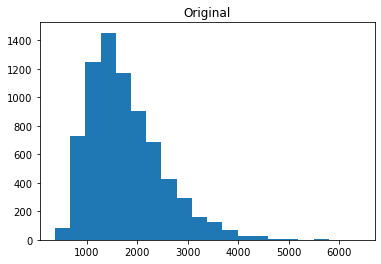

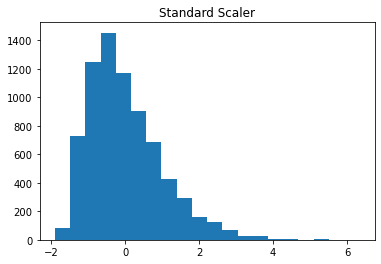

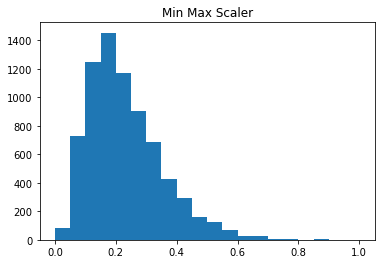

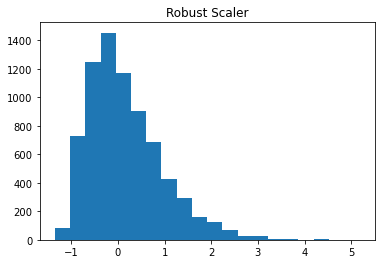

In [738]:
# visualize it!
for title, data in scalers.items():
    plt.hist(data, bins=20)
    plt.title(f"{title}")
    plt.show()
# This is reminding me of the need for log transformations...

In [743]:
# Above left skew reminding me of the need for log transformations...

## Plot X cols individually

bedrooms


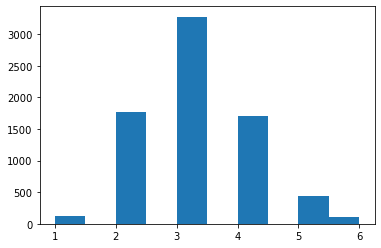

bathrooms


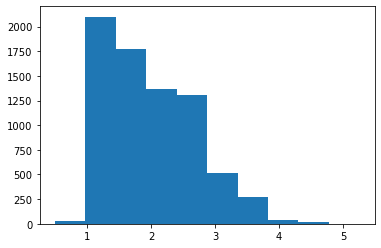

sqft_living


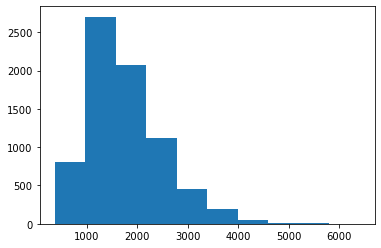

sqft_lot


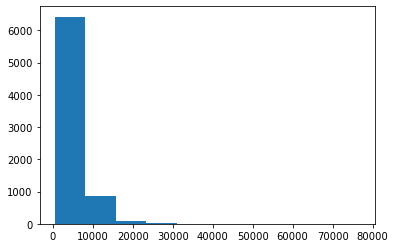

waterfront


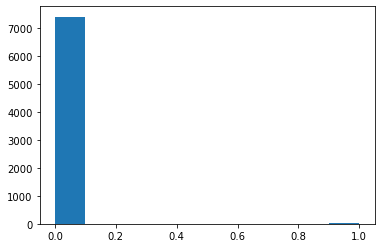

view


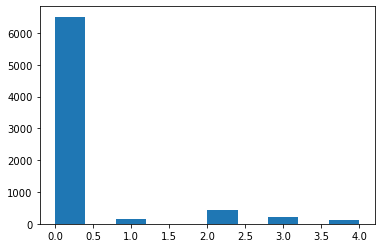

condition


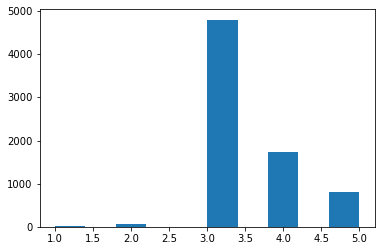

grade


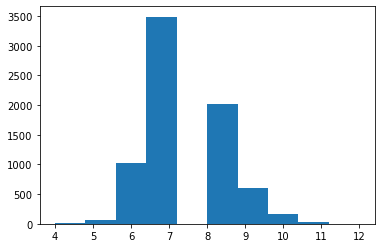

sqft_above


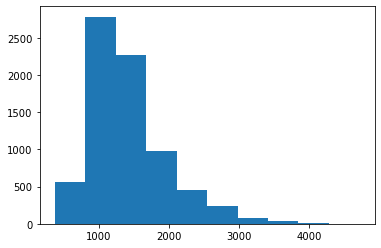

yr_built


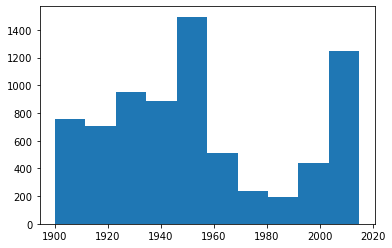

yr_renovated


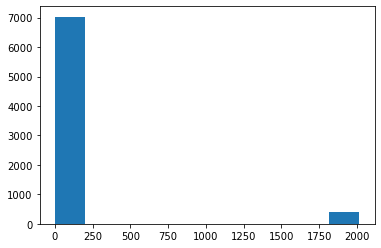

zipcode


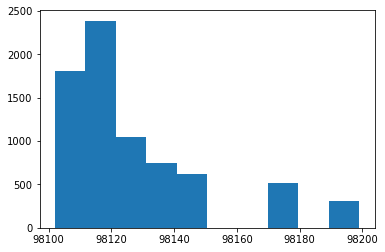

lat


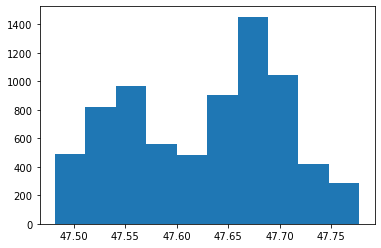

long


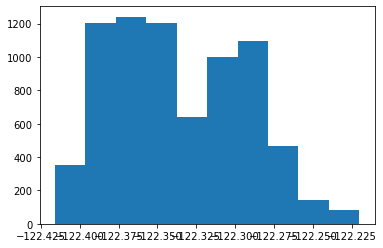

sqft_living15


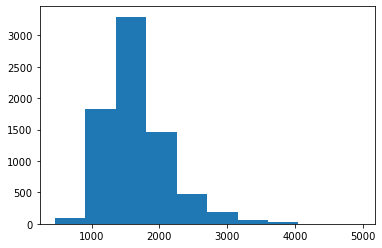

sqft_lot15


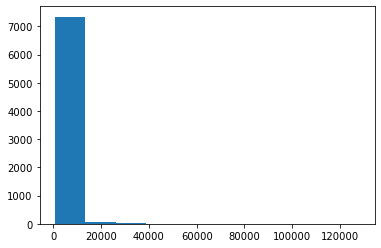

yr_of_assessment


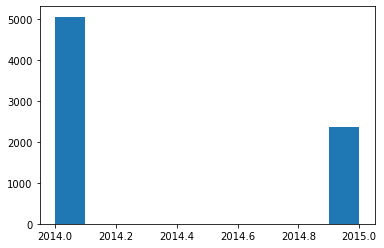

has_basement


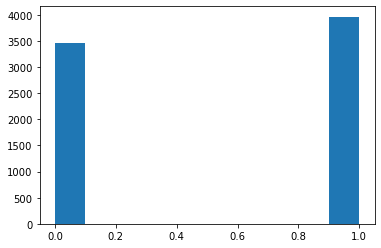

has_been_renovated


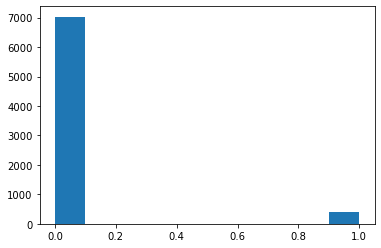

In [742]:
for col in X_cols:
    print(col)
    plt.hist(seattle_zips_df[col])
    plt.show()

## How do you numerical values but seem and plot categorical...OHE?
Condition/grade seem categorical...
yr_built, yr_renovated - numerical values but seem and plot categorical...OHE?
same with zip, lat, long
yr_of_assessment, has_basement, has_been_renovated


Other trends seen:
Bathrooms, sqft_living are skewed left
sqft_lot seem to have outliers (skewed far left)
Should remove view since has been viewed wasn't impactful...
sqft_above skewed left
sqft_living15 seems normal
sqft_lot15 seem to have outliers (skewed far left)